Importing Libraries

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinnb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading the data

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

Getting the shape of the data.
Data has been divided into two, Training and Testing data

In [3]:
#Getting the shape of the data
print(train.shape)
print(test.shape)

(3870, 44)
(1290, 43)


The train data set has 3870 rows and 44 columns

The test data set has 1290 rows and 43 columns

Checking the column that is in train data but missing in the test data

In [4]:
#Columns of both datasets
train_columns = set(train.columns)
test_columns= set(test.columns)
set.difference(train_columns,test_columns)

{'Yield'}

The yield is the one missing in the dataset
- Since the target variable is yield, it being missing in the test dataset is to prevent unintentional data leakage to ensure model evaluation is unbiased and reflect real world scenarios where yield is not known in advance.

Getting the data


In [5]:
#Getting the first five rows of the train data
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [6]:
#Getting unique elements in District columns
train.District.unique()

array(['Nalanda', 'Gaya', 'Vaishali', 'Jamui'], dtype=object)

This shows that there are four Districts where Rice farming is mainly practised in  India that is: Nalanda, Gaya, Vaishali and Jamui.

In [7]:
#getting the unique block where farming is done
train.Block.unique()

array(['Noorsarai', 'Rajgir', 'Gurua', 'Garoul', 'Khaira', 'Jamui',
       'Mahua', 'Chehrakala', 'Wazirganj'], dtype=object)

In [8]:
#finding the number of blocks
len(train.Block.unique())

9

There are a total of 9 blocks where rice Farming is done in different districts


Each district and blocks it contains

In [9]:
# a district to store the mapping
district_to_block ={}

#Iterating through each row of the DataFrame
for index, row in train.iterrows():
    district = row['District']
    block = row['Block']
    if district in district_to_block:
        district_to_block[district].add(block)
    else:
        district_to_block[district]={block}
print(district_to_block)

{'Nalanda': {'Noorsarai', 'Rajgir'}, 'Gaya': {'Wazirganj', 'Gurua'}, 'Vaishali': {'Garoul', 'Mahua', 'Chehrakala'}, 'Jamui': {'Khaira', 'Gurua', 'Jamui'}}


In [10]:
df = pd.DataFrame(list(district_to_block.items()), columns=['District','Blocks'])
print(df)

   District                       Blocks
0   Nalanda          {Noorsarai, Rajgir}
1      Gaya           {Wazirganj, Gurua}
2  Vaishali  {Garoul, Mahua, Chehrakala}
3     Jamui       {Khaira, Gurua, Jamui}


Nalanda and Gaya Districts have two blocks each and Vaishali and Jamui have three blocks each.


###### Comparing Cultivated land and crop Cultivated land

In [11]:
cult_land_mean = train['CultLand'].mean()
crop_cult_land_mean = train['CropCultLand'].mean()

cult_land_median = train['CultLand'].median()
crop_cult_land_median = train['CropCultLand'].median()

#compare means and medians
print("Cultland Mean:", round(cult_land_mean,3))
print("CropCultland Mean:", round(crop_cult_land_mean,3))
print("Cultland Median:", cult_land_median)
print("CropCultland Median:", crop_cult_land_median)




Cultland Mean: 28.528
CropCultland Mean: 24.727
Cultland Median: 20.0
CropCultland Median: 20.0


While comparing the cultivatedland and the crop cultivated land there is a disperity indicating not all the land that is cultivated that rice is planted.


###### Methods used in harvesting and threshing

In [12]:
print(f"Harvesting {train.Harv_method.unique()}")
print(f"Threshing {train.Threshing_method.unique()}")

Harvesting ['machine' 'hand']
Threshing ['machine' 'hand']


In [13]:
train.Harv_method.value_counts(normalize=True)

Harv_method
hand       0.941085
machine    0.058915
Name: proportion, dtype: float64

In [14]:
train.Threshing_method.value_counts(normalize=True)

Threshing_method
machine    0.542119
hand       0.457881
Name: proportion, dtype: float64

During Harvesting farmers use hands mostly while during threshing most farmers prefer machine.
- When harvesting 94% of the farmers use hands compared to only 6% who use machine.
- During threshing there is almost even use of machine and hands having 54% and 46% respectively


###### Land preparation methods

In [15]:
methods = np.array(train.LandPreparationMethod)

tokenized_array = [word_tokenize(text) for text in methods]

unique_tokens_set = set()

for tokens in tokenized_array:
    unique_tokens_set.update(tokens)

print(unique_tokens_set)

{'BullockPlough', 'TractorPlough', 'WetTillagePuddling', 'Other', 'FourWheelTracRotavator'}


Farmers use the following methods to prepare land: FourwheeltracRotavator, TractorPlough , BullockPlough, WetTillagePuddling and others. This indicate farmers use both traditional ways of land preparation ie BullockPlough and modernised by use of machines


# Data Cleaning

In [16]:
#Checking For duplicate rows in Train ID column
train['ID'].duplicated().sum()

0

In [17]:
#Checking for duplicate rows in Test ID column
test['ID'].duplicated().sum()

0

In [18]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [19]:
#checking for missing values
train.isna().sum().sort_values(ascending=False)

2appDaysUrea                          2700
2tdUrea                               2694
CropOrgFYM                            2674
Ganaura                               2417
BasalUrea                             1704
PCropSolidOrgFertAppMethod            1337
OrgFertilizers                        1335
TransIrriCost                          882
1tdUrea                                556
1appDaysUrea                           556
BasalDAP                               543
TransplantingIrrigationPowerSource     503
FirstTopDressFert                      485
MineralFertAppMethod.1                 481
NursDetFactor                          289
TransDetFactor                         289
SeedlingsPerPit                        289
Harv_hand_rent                         252
StandingWater                          238
TransplantingIrrigationHours           193
CropbasalFerts                         188
TransplantingIrrigationSource          115
RcNursEstDate                           83
Residue_per

In [20]:
train['PCropSolidOrgFertAppMethod'].value_counts()

PCropSolidOrgFertAppMethod
SoilApplied        1680
Broadcasting        841
RootApplication       9
Spray                 3
Name: count, dtype: int64


I replaced the '2tdUrea and 1tdUrea' columns missing values with 0 because urea was not applied to the crop in the third dose. - amount of urea applied in the third application.

Some farmers applied both the fertilizers (basalDAP and basalUrea) while others only applied one. Hence we assume they never applied and replace them with zero.	

I replaced NaN in Ganaura and GanauraFYM with zero.

I replaced Harv_hand_rent NaN with zero because the farmers used machines instead

In [21]:
# Filling missing values in specific columns with 0
train["BasalDAP"]= train["BasalDAP"].fillna(0)
train['BasalUrea']= train["BasalUrea"].fillna(0)
train['1tdUrea']= train['1tdUrea'].fillna(0)
train['2tdUrea']= train['2tdUrea'].fillna(0)
train['CropOrgFYM']= train['CropOrgFYM'].fillna(0)
train['Ganaura']= train['Ganaura'].fillna(0)
train['Harv_hand_rent']= train['Harv_hand_rent'].fillna(0)

In [22]:
train.isna().sum().sort_values(ascending = False)

2appDaysUrea                          2700
PCropSolidOrgFertAppMethod            1337
OrgFertilizers                        1335
TransIrriCost                          882
1appDaysUrea                           556
TransplantingIrrigationPowerSource     503
FirstTopDressFert                      485
MineralFertAppMethod.1                 481
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
StandingWater                          238
TransplantingIrrigationHours           193
CropbasalFerts                         188
TransplantingIrrigationSource          115
RcNursEstDate                           83
Harv_date                                0
Harv_hand_rent                           0
Threshing_date                           0
Threshing_method                         0
Residue_length                           0
Harv_method                              0
Residue_perc                             0
Stubble_use

I dropped OrgFertilizers column since it explains the type of fertilizer a farmer used and there exists a column that specifies if Ganaura or GanauraFYM used. 

Hence, justification for dropping 2appDaysUrea and 1appDaysUrea columns.

I also dropped the RcNursEstaDate because it has inconsistent dates.

In [23]:
train.drop(columns = ['1appDaysUrea', '2appDaysUrea', 'OrgFertilizers', 'RcNursEstDate', 'ID'], axis=1, inplace= True)

We have only two type of organic manure[CropOrgFYM ,Ganaura ], Where none of them was used we have a missing value in PCropSolidOrgFertAppMethod column we have a missing element so we will replace with "notused"

In [24]:
train[['PCropSolidOrgFertAppMethod',"Ganaura","CropOrgFYM"]]

,PCropSolidOrgFertAppMethod,Ganaura,CropOrgFYM
0,NaN,0.0,0.0
1,NaN,0.0,0.0
2,SoilApplied,1.0,1.0
3,SoilApplied,1.0,0.0
4,NaN,0.0,0.0
...,...,...,...
3865,SoilApplied,1.0,0.0
3866,NaN,0.0,0.0
3867,Broadcasting,1.0,0.0
3868,NaN,0.0,0.0


In [25]:
# replacing the NAN with notused
train["PCropSolidOrgFertAppMethod"] = train["PCropSolidOrgFertAppMethod"].fillna("notused")

In [26]:
#viewing the rest of the column with the missing data
train[["PCropSolidOrgFertAppMethod","TransIrriCost","TransplantingIrrigationPowerSource","FirstTopDressFert",
    "MineralFertAppMethod.1", "SeedlingsPerPit","NursDetFactor","TransDetFactor","StandingWater","TransplantingIrrigationHours",  
    "CropbasalFerts","TransplantingIrrigationSource" ]]

,PCropSolidOrgFertAppMethod,TransIrriCost,TransplantingIrrigationPowerSource,FirstTopDressFert,MineralFertAppMethod.1,SeedlingsPerPit,NursDetFactor,TransDetFactor,StandingWater,TransplantingIrrigationHours,CropbasalFerts,TransplantingIrrigationSource
0,notused,200.0,Electric,Urea,Broadcasting,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,2.0,5.0,Urea,Boring
1,notused,125.0,Electric,Urea,Broadcasting,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,3.0,5.0,DAP Urea,Boring
2,SoilApplied,80.0,Electric,Urea,RootApplication,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,2.0,4.0,DAP,Boring
3,SoilApplied,NaN,NaN,Urea,Broadcasting,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,DAP Urea,NaN
4,notused,300.0,Electric,Urea,Broadcasting,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,2.0,9.0,Urea DAP,Boring
...,...,...,...,...,...,...,...,...,...,...,...,...
3865,SoilApplied,360.0,Electric,Urea,Broadcasting,NaN,NaN,NaN,5.0,7.0,DAP Urea,Boring
3866,notused,NaN,Diesel,Urea,Broadcasting,1.0,IrrigWaterAvailability LabourAvailability,IrrigWaterAvailability LaborAvailability,3.0,3.0,DAP,Boring
3867,Broadcasting,120.0,Electric,NaN,NaN,1.0,CalendarDate IrrigWaterAvailability,CalendarDate IrrigWaterAvailability,5.0,6.0,Urea,Boring
3868,notused,NaN,NaN,NaN,NaN,4.0,SeedAvailability IrrigWaterAvailability,IrrigWaterAvailability RainArrival SeedlingAge,9.0,2.0,DAP Urea,Canal


Replacing the rest of the missing value with their respective mode to their column

In [27]:
#replacing the numerical columns with mode
train['StandingWater'] = train['StandingWater'].fillna(train['StandingWater'].mode().iloc[0])
train['SeedlingsPerPit'] = train['SeedlingsPerPit'].fillna(train['SeedlingsPerPit'].mode().iloc[0])
train['TransplantingIrrigationHours'] = train['TransplantingIrrigationHours'].fillna(train['TransplantingIrrigationHours'].mode().iloc[0])
train['TransIrriCost'] = train['TransIrriCost'].fillna(train['TransIrriCost'].mode().iloc[0])

In [28]:
#replacing the categorical column with the most common element
train["TransplantingIrrigationPowerSource"] = train['TransplantingIrrigationPowerSource'].fillna(train['TransplantingIrrigationPowerSource'].mode().iloc[0])
train['FirstTopDressFert'] = train['FirstTopDressFert'].fillna(train['FirstTopDressFert'].mode().iloc[0])
train['MineralFertAppMethod.1'] = train['MineralFertAppMethod.1'].fillna(train['MineralFertAppMethod.1'].mode().iloc[0])
train['TransDetFactor'] = train['TransDetFactor'].fillna(train['TransDetFactor'].mode().iloc[0])
train['NursDetFactor'] = train['NursDetFactor'].fillna(train['NursDetFactor'].mode().iloc[0])
train['CropbasalFerts'] = train['CropbasalFerts'].fillna(train['CropbasalFerts'].mode().iloc[0])
train['TransplantingIrrigationSource'] = train['TransplantingIrrigationSource'].fillna(train['TransplantingIrrigationSource'].mode().iloc[0])


Checking for missing values

In [29]:
train.isna().sum().sort_values(ascending = False)

District                              0
Harv_method                           0
BasalDAP                              0
BasalUrea                             0
MineralFertAppMethod                  0
FirstTopDressFert                     0
1tdUrea                               0
2tdUrea                               0
MineralFertAppMethod.1                0
Harv_date                             0
NoFertilizerAppln                     0
Harv_hand_rent                        0
Threshing_date                        0
Threshing_method                      0
Residue_length                        0
Residue_perc                          0
Stubble_use                           0
Acre                                  0
CropbasalFerts                        0
PCropSolidOrgFertAppMethod            0
Block                                 0
SeedlingsPerPit                       0
CultLand                              0
CropCultLand                          0
LandPreparationMethod                 0


# Exploratory Data Analysis

Here we analyse the relationship between the numeric features and the target column, Yield

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   District                            3870 non-null   object 
 1   Block                               3870 non-null   object 
 2   CultLand                            3870 non-null   int64  
 3   CropCultLand                        3870 non-null   int64  
 4   LandPreparationMethod               3870 non-null   object 
 5   CropTillageDate                     3870 non-null   object 
 6   CropTillageDepth                    3870 non-null   int64  
 7   CropEstMethod                       3870 non-null   object 
 8   SeedingSowingTransplanting          3870 non-null   object 
 9   SeedlingsPerPit                     3870 non-null   float64
 10  NursDetFactor                       3870 non-null   object 
 11  TransDetFactor                      3870 no

This indicates that there are no missing values in the columns

Understanding the central tendency, spread, and shape of the distribution for each numeric variable in the dataset.

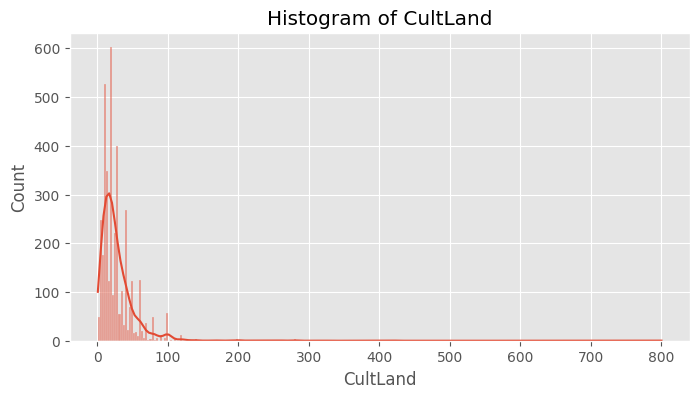

Description of CultLand:
count    3870.000000
mean       28.527907
std        30.454218
min         1.000000
25%        12.000000
50%        20.000000
75%        35.000000
max       800.000000
Name: CultLand, dtype: float64



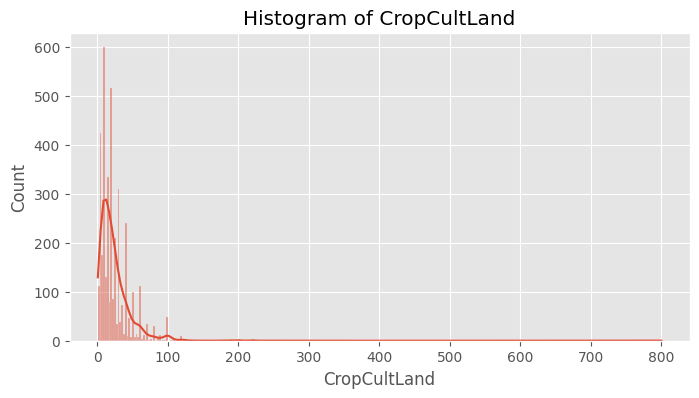

Description of CropCultLand:
count    3870.000000
mean       24.727132
std        27.994802
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       800.000000
Name: CropCultLand, dtype: float64



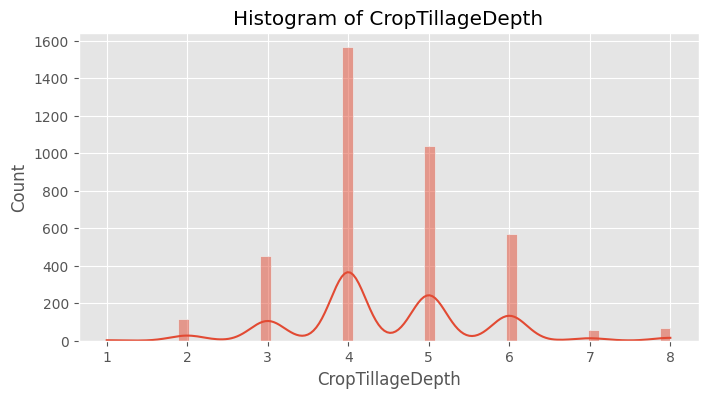

Description of CropTillageDepth:
count    3870.000000
mean        4.488372
std         1.133044
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: CropTillageDepth, dtype: float64



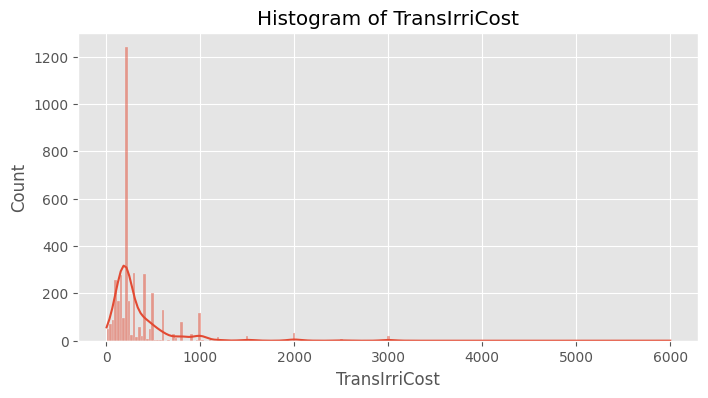

Description of TransIrriCost:
count    3870.000000
mean      338.765891
std       376.422445
min         1.000000
25%       180.000000
50%       200.000000
75%       400.000000
max      6000.000000
Name: TransIrriCost, dtype: float64



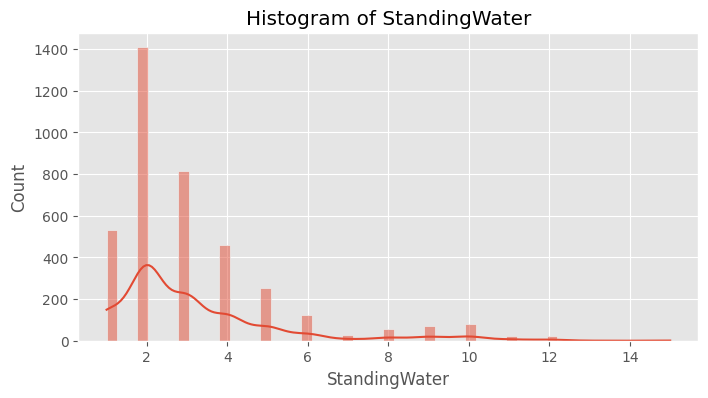

Description of StandingWater:
count    3870.000000
mean        3.170801
std         2.159216
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: StandingWater, dtype: float64



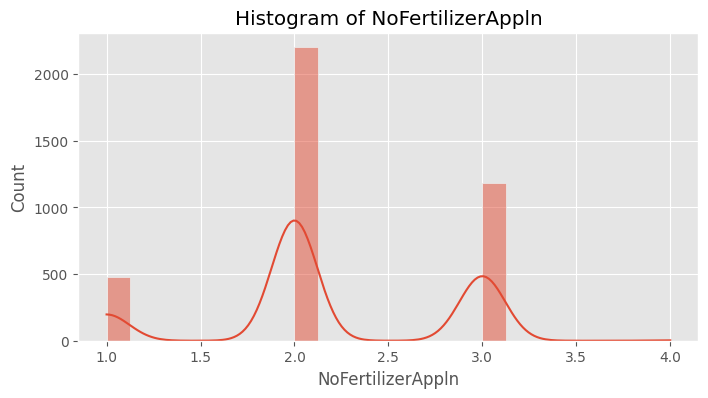

Description of NoFertilizerAppln:
count    3870.000000
mean        2.184496
std         0.634632
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: NoFertilizerAppln, dtype: float64



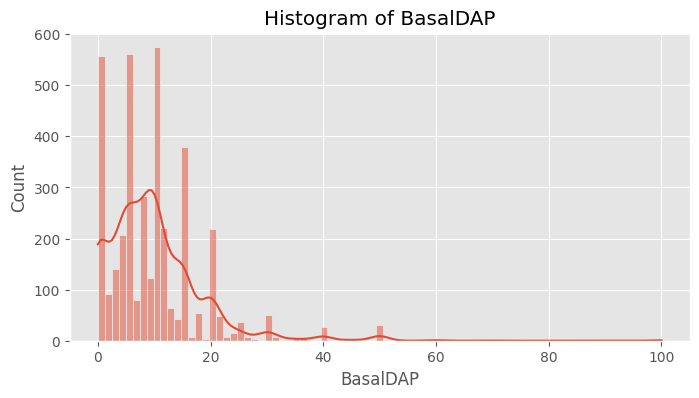

Description of BasalDAP:
count    3870.000000
mean        9.845478
std         8.763596
min         0.000000
25%         4.000000
50%         9.000000
75%        13.750000
max       100.000000
Name: BasalDAP, dtype: float64



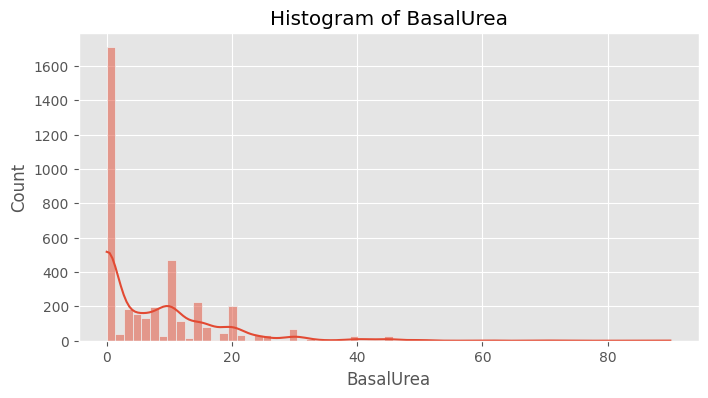

Description of BasalUrea:
count    3870.000000
mean        7.472868
std         9.829125
min         0.000000
25%         0.000000
50%         5.000000
75%        11.000000
max        90.000000
Name: BasalUrea, dtype: float64



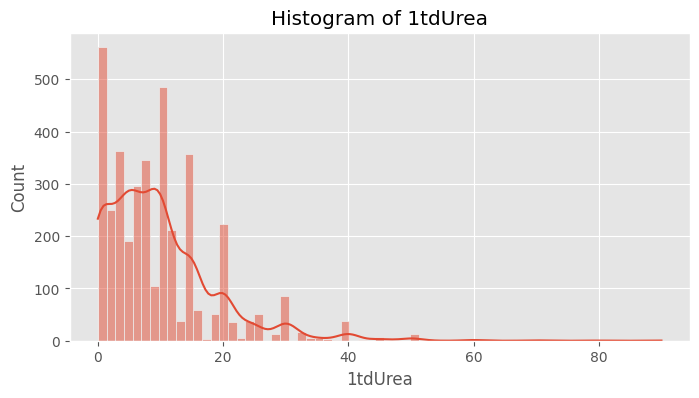

Description of 1tdUrea:
count    3870.000000
mean        9.859690
std         9.020164
min         0.000000
25%         4.000000
50%         8.000000
75%        15.000000
max        90.000000
Name: 1tdUrea, dtype: float64



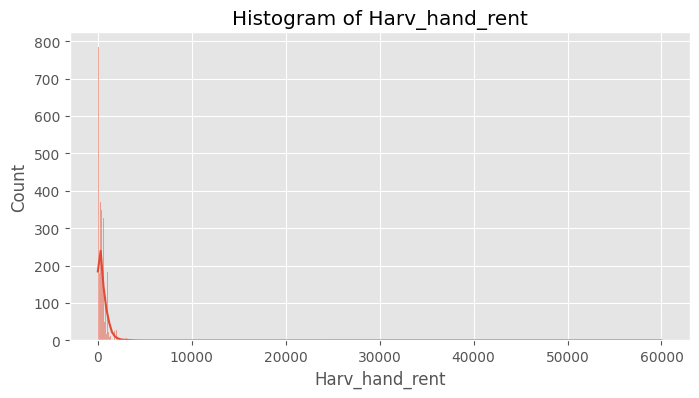

Description of Harv_hand_rent:
count     3870.000000
mean       501.679587
std       1108.843917
min          0.000000
25%        120.000000
50%        300.000000
75%        600.000000
max      60000.000000
Name: Harv_hand_rent, dtype: float64



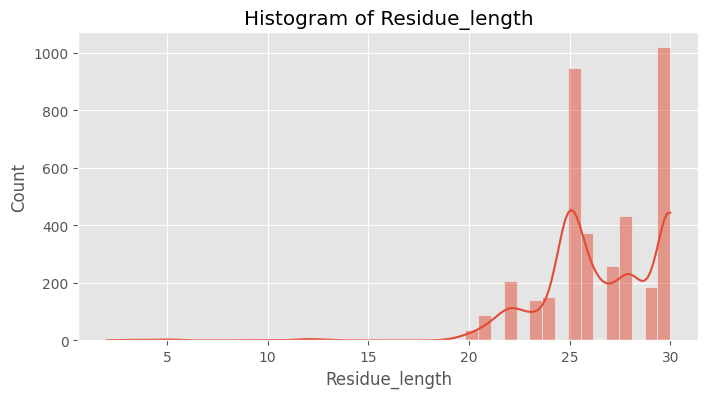

Description of Residue_length:
count    3870.000000
mean       26.517829
std         3.192873
min         2.000000
25%        25.000000
50%        26.000000
75%        30.000000
max        30.000000
Name: Residue_length, dtype: float64



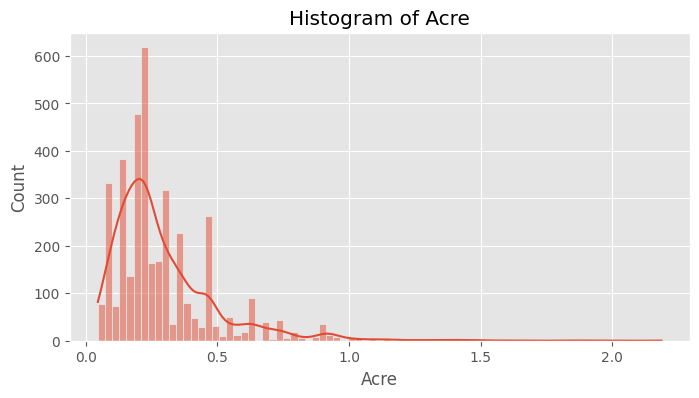

Description of Acre:
count    3870.000000
mean        0.292826
std         0.206918
min         0.045455
25%         0.156250
50%         0.227273
75%         0.370370
max         2.187500
Name: Acre, dtype: float64



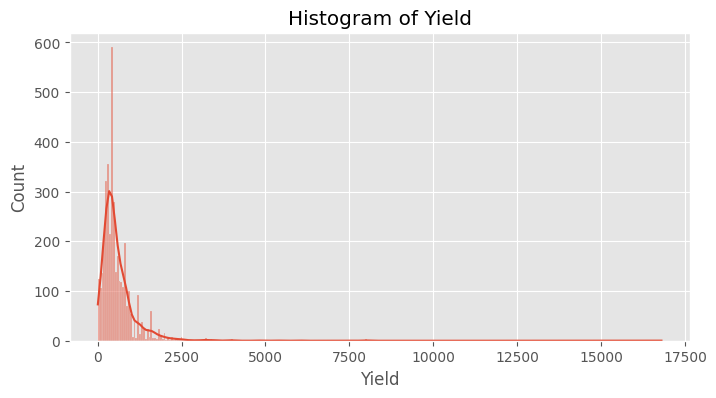

Description of Yield:
count     3870.000000
mean       594.269251
std        651.916953
min          4.000000
25%        300.000000
50%        425.000000
75%        740.000000
max      16800.000000
Name: Yield, dtype: float64



In [31]:
# Specify columns to exclude from the numeric columns
exclude_columns = ['SeedlingsPerPit', 'TransplantingIrrigationHours', 'Ganaura', 'CropOrgFYM', '2tdUrea', 'Residue_perc']

#numeric columns excluding the specified ones
numeric_columns = [col for col in train.select_dtypes(include='number').columns if col not in exclude_columns]

# Generate histograms for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Generate a description for the visualization
    description = train[col].describe()
    print(f"Description of {col}:")
    print(description)
    print()


Visualisations for categorical columns

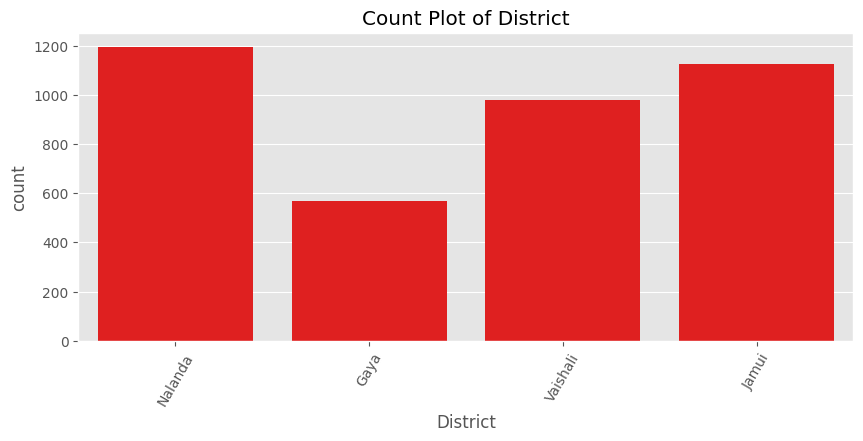

Description of District:
District
Nalanda     1193
Jamui       1127
Vaishali     980
Gaya         570
Name: count, dtype: int64



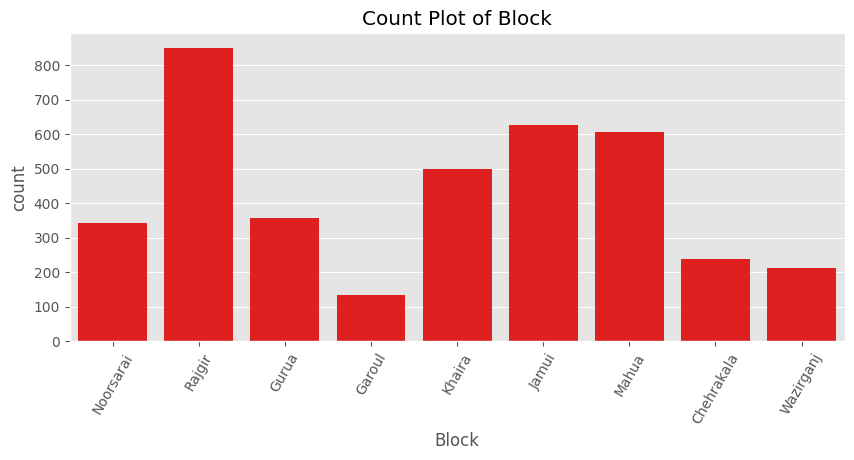

Description of Block:
Block
Rajgir        850
Jamui         626
Mahua         607
Khaira        500
Gurua         358
Noorsarai     343
Chehrakala    239
Wazirganj     213
Garoul        134
Name: count, dtype: int64



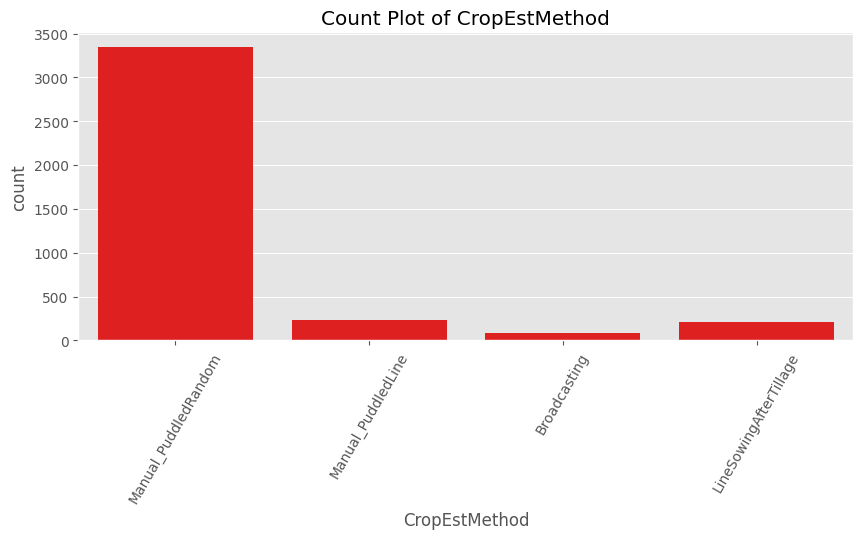

Description of CropEstMethod:
CropEstMethod
Manual_PuddledRandom      3346
Manual_PuddledLine         235
LineSowingAfterTillage     206
Broadcasting                83
Name: count, dtype: int64



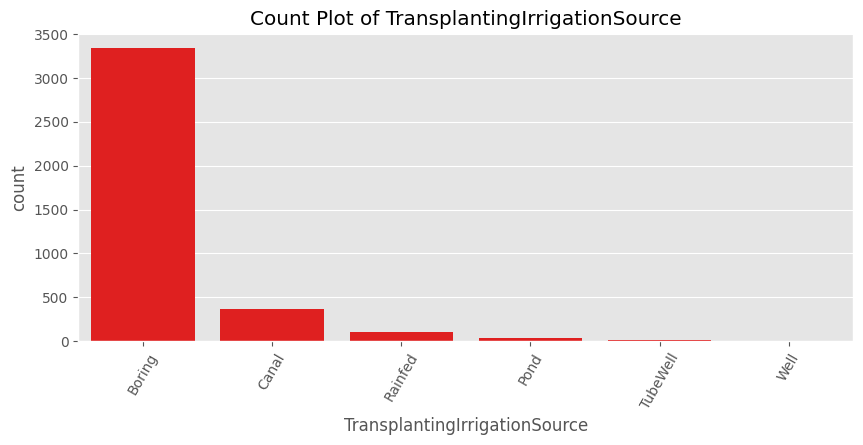

Description of TransplantingIrrigationSource:
TransplantingIrrigationSource
Boring      3343
Canal        373
Rainfed      103
Pond          36
TubeWell      12
Well           3
Name: count, dtype: int64



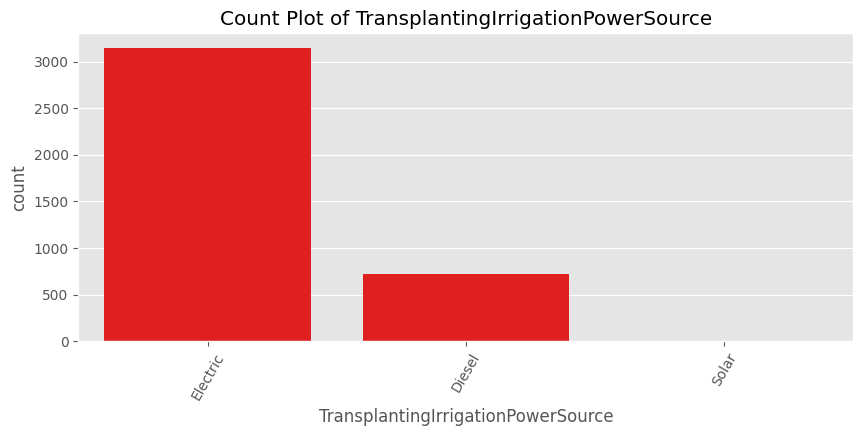

Description of TransplantingIrrigationPowerSource:
TransplantingIrrigationPowerSource
Electric    3148
Diesel       720
Solar          2
Name: count, dtype: int64



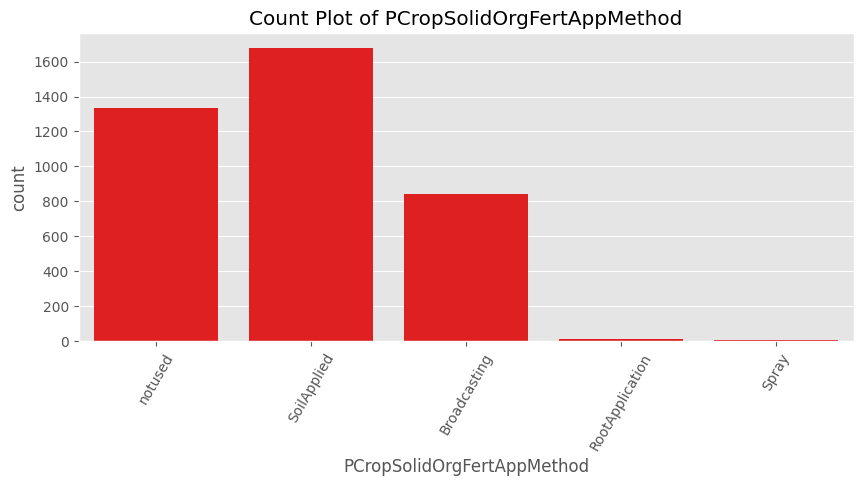

Description of PCropSolidOrgFertAppMethod:
PCropSolidOrgFertAppMethod
SoilApplied        1680
notused            1337
Broadcasting        841
RootApplication       9
Spray                 3
Name: count, dtype: int64



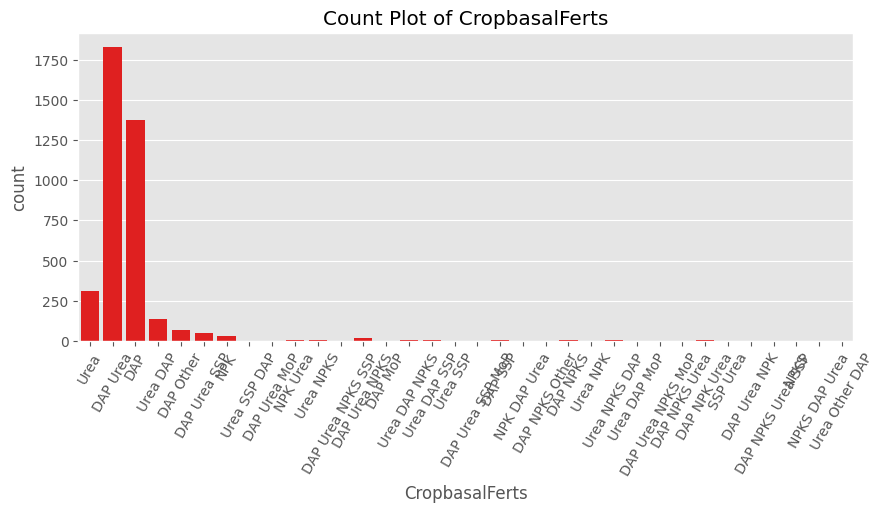

Description of CropbasalFerts:
CropbasalFerts
DAP Urea             1828
DAP                  1379
Urea                  308
Urea DAP              134
DAP Other              70
DAP Urea SSP           51
NPK                    29
DAP Urea NPKS          18
NPK Urea                8
Urea DAP SSP            7
Urea NPKS               6
Urea DAP NPKS           3
DAP SSP                 3
DAP NPKS                3
Urea NPKS DAP           3
DAP NPK Urea            2
NPKS                    1
DAP NPKS Urea SSP       1
Urea DAP MoP            1
DAP Urea NPK            1
SSP Urea                1
NPKS DAP Urea           1
DAP NPKS Urea           1
DAP Urea NPKS MoP       1
DAP Urea SSP MoP        1
Urea NPK                1
DAP NPKS Other          1
NPK DAP Urea            1
Urea SSP                1
DAP MoP                 1
DAP Urea NPKS SSP       1
DAP Urea MoP            1
Urea SSP DAP            1
Urea Other DAP          1
Name: count, dtype: int64



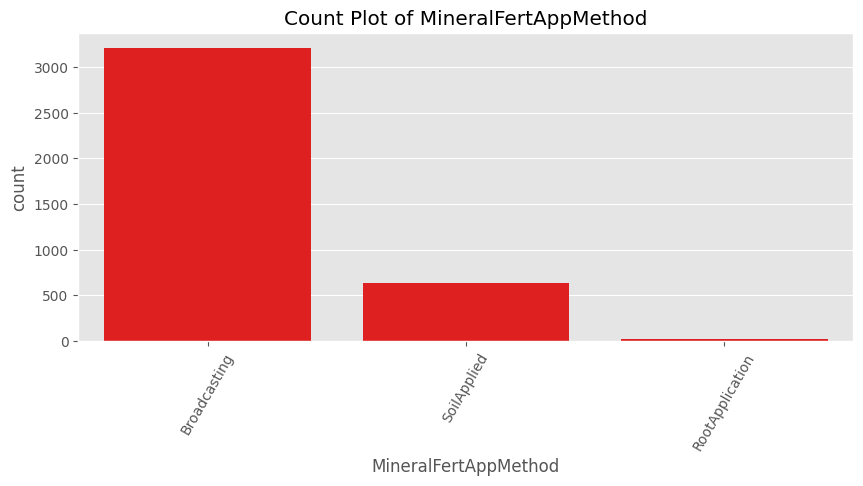

Description of MineralFertAppMethod:
MineralFertAppMethod
Broadcasting       3214
SoilApplied         638
RootApplication      18
Name: count, dtype: int64



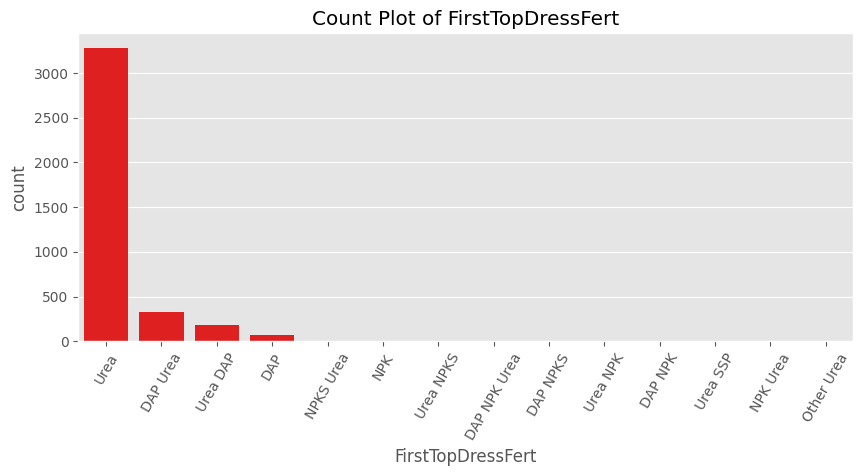

Description of FirstTopDressFert:
FirstTopDressFert
Urea            3283
DAP Urea         322
Urea DAP         177
DAP               64
NPKS Urea          6
Urea NPKS          5
NPK                3
DAP NPKS           3
NPK Urea           2
DAP NPK Urea       1
Urea NPK           1
DAP NPK            1
Urea SSP           1
Other Urea         1
Name: count, dtype: int64



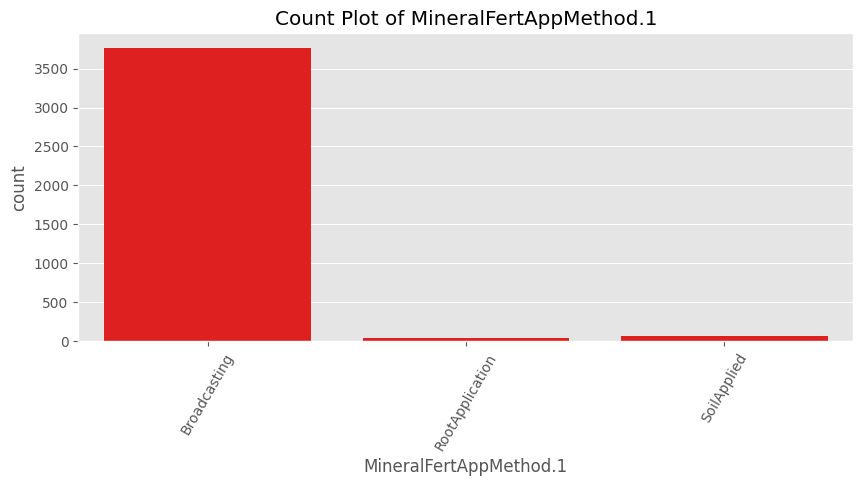

Description of MineralFertAppMethod.1:
MineralFertAppMethod.1
Broadcasting       3769
SoilApplied          64
RootApplication      37
Name: count, dtype: int64



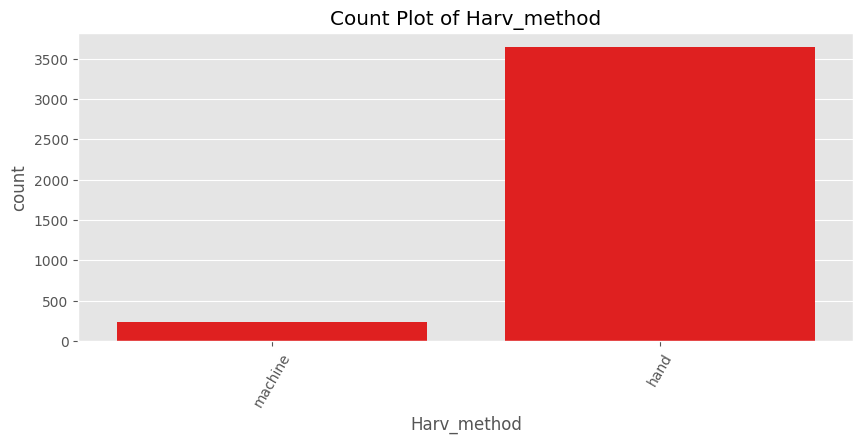

Description of Harv_method:
Harv_method
hand       3642
machine     228
Name: count, dtype: int64



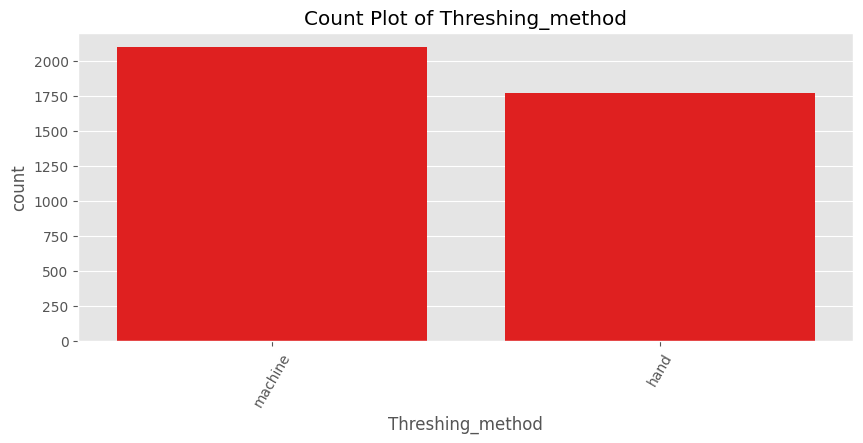

Description of Threshing_method:
Threshing_method
machine    2098
hand       1772
Name: count, dtype: int64



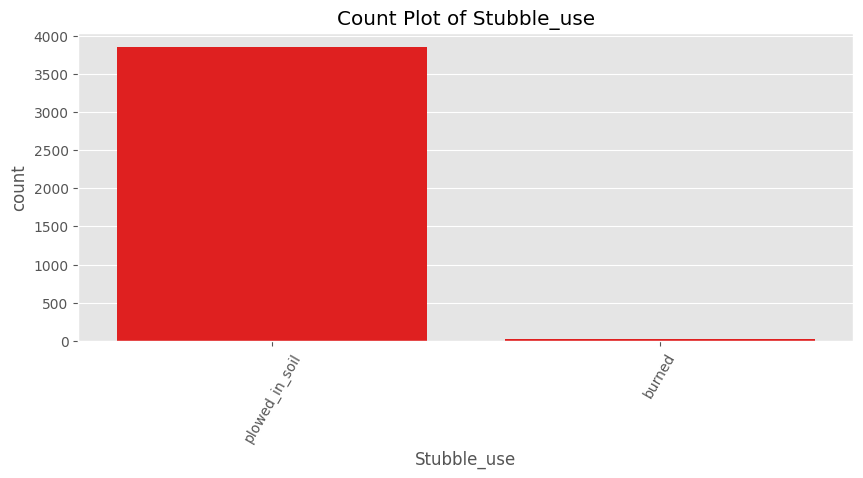

Description of Stubble_use:
Stubble_use
plowed_in_soil    3846
burned              24
Name: count, dtype: int64



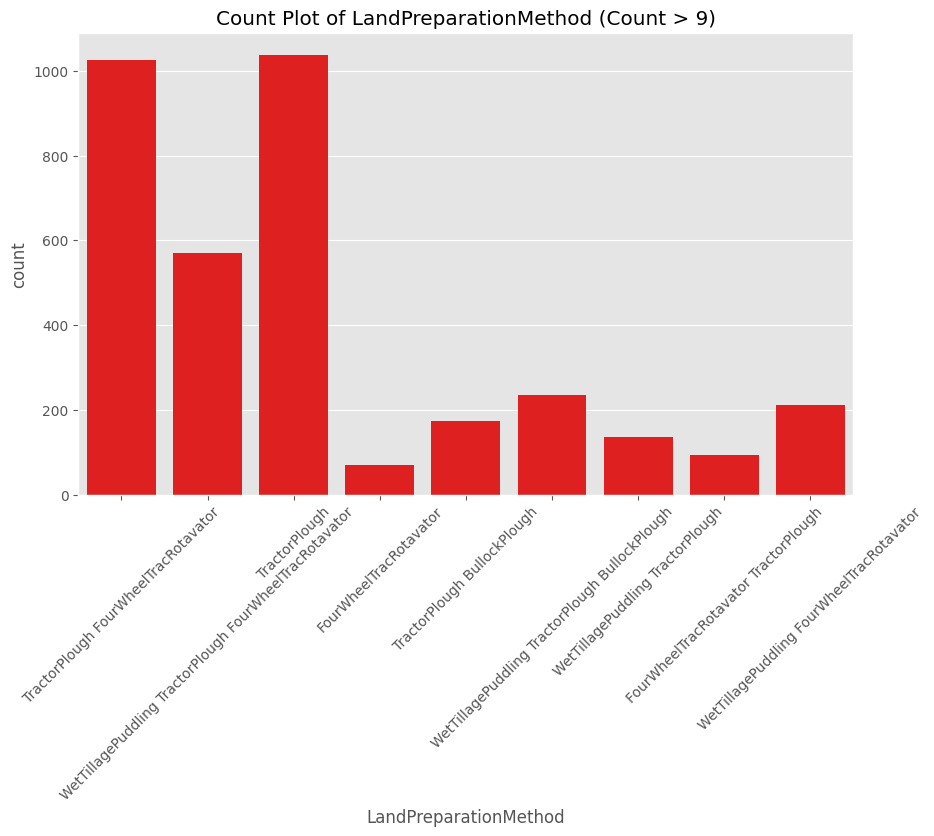

In [32]:

# Categorical Columns
# List of columns to exclude
exclude_columns = ['Threshing_date', 'Harv_date', 'TransDetFactor', 'NursDetFactor', 'SeedingSowingTransplanting', 'CropTillageDate','LandPreparationMethod']

# Filter the categorical columns
categorical_columns = [col for col in train.select_dtypes(include='object').columns if col not in exclude_columns]

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train, x=col, color='red')  # Set the color to red
    plt.xticks(rotation=60)
    plt.title(f'Count Plot of {col}')
    plt.show()

    # Generate a description for the column
    description = train[col].value_counts()
    print(f"Description of {col}:")
    print(description)
    print()

# Count Plot for LandPreparationMethod with count above 9
land_prep_counts = train['LandPreparationMethod'].value_counts()
land_prep_counts = land_prep_counts[land_prep_counts > 50]

plt.figure(figsize=(10, 6))
sns.countplot(data=train[train['LandPreparationMethod'].isin(land_prep_counts.index)], x='LandPreparationMethod', color='red')  # Set the color to red
plt.xticks(rotation=45)
plt.title('Count Plot of LandPreparationMethod (Count > 9)')
plt.show()

Bivariate Visualizations

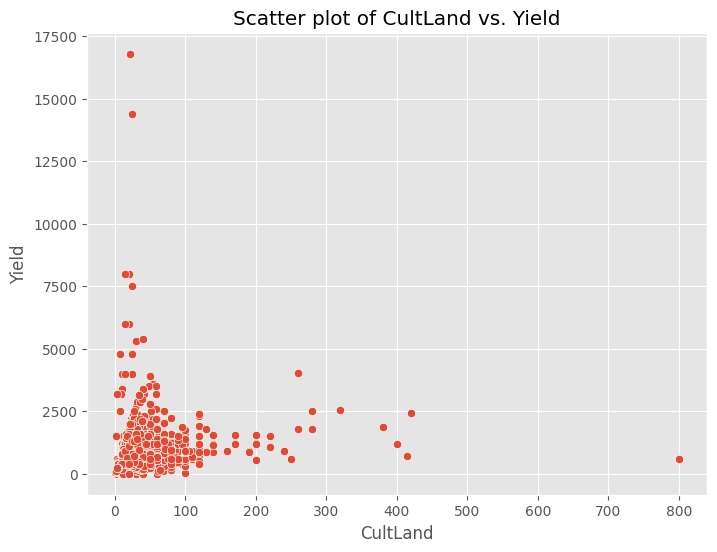

In [34]:
#Bivariate visualizations
# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=train, x='CultLand', y='Yield')
plt.title('Scatter plot of CultLand vs. Yield')
plt.show()

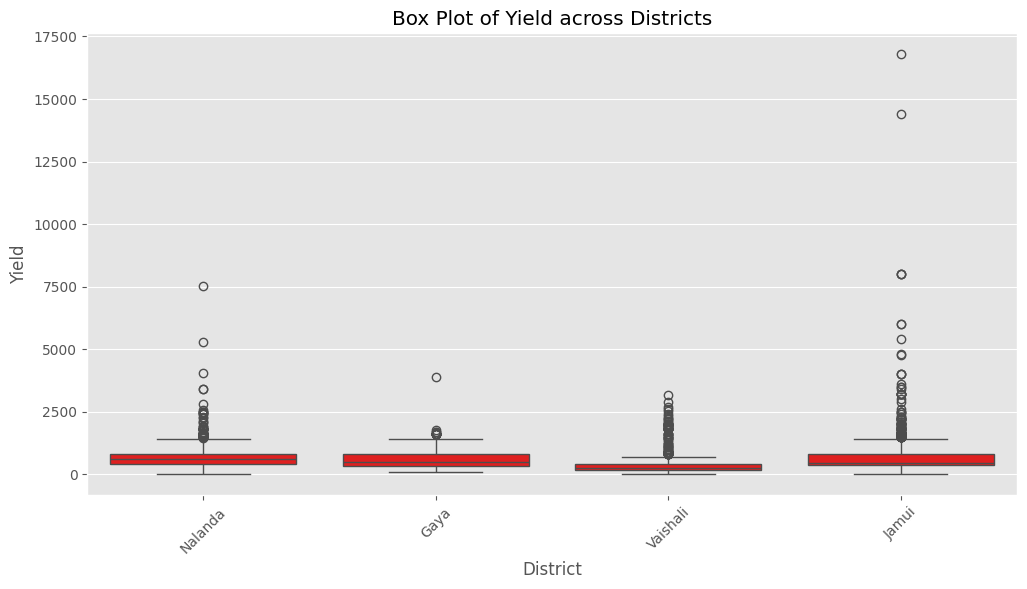

In [35]:
#Box Plot with Categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='District', y='Yield', color="red")
plt.xticks(rotation=45)
plt.title('Box Plot of Yield across Districts')
plt.show()

In [33]:
numeric_cols = ['Yield', 'CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'StandingWater', 'NoFertilizerAppln', 'BasalDAP', 'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre']

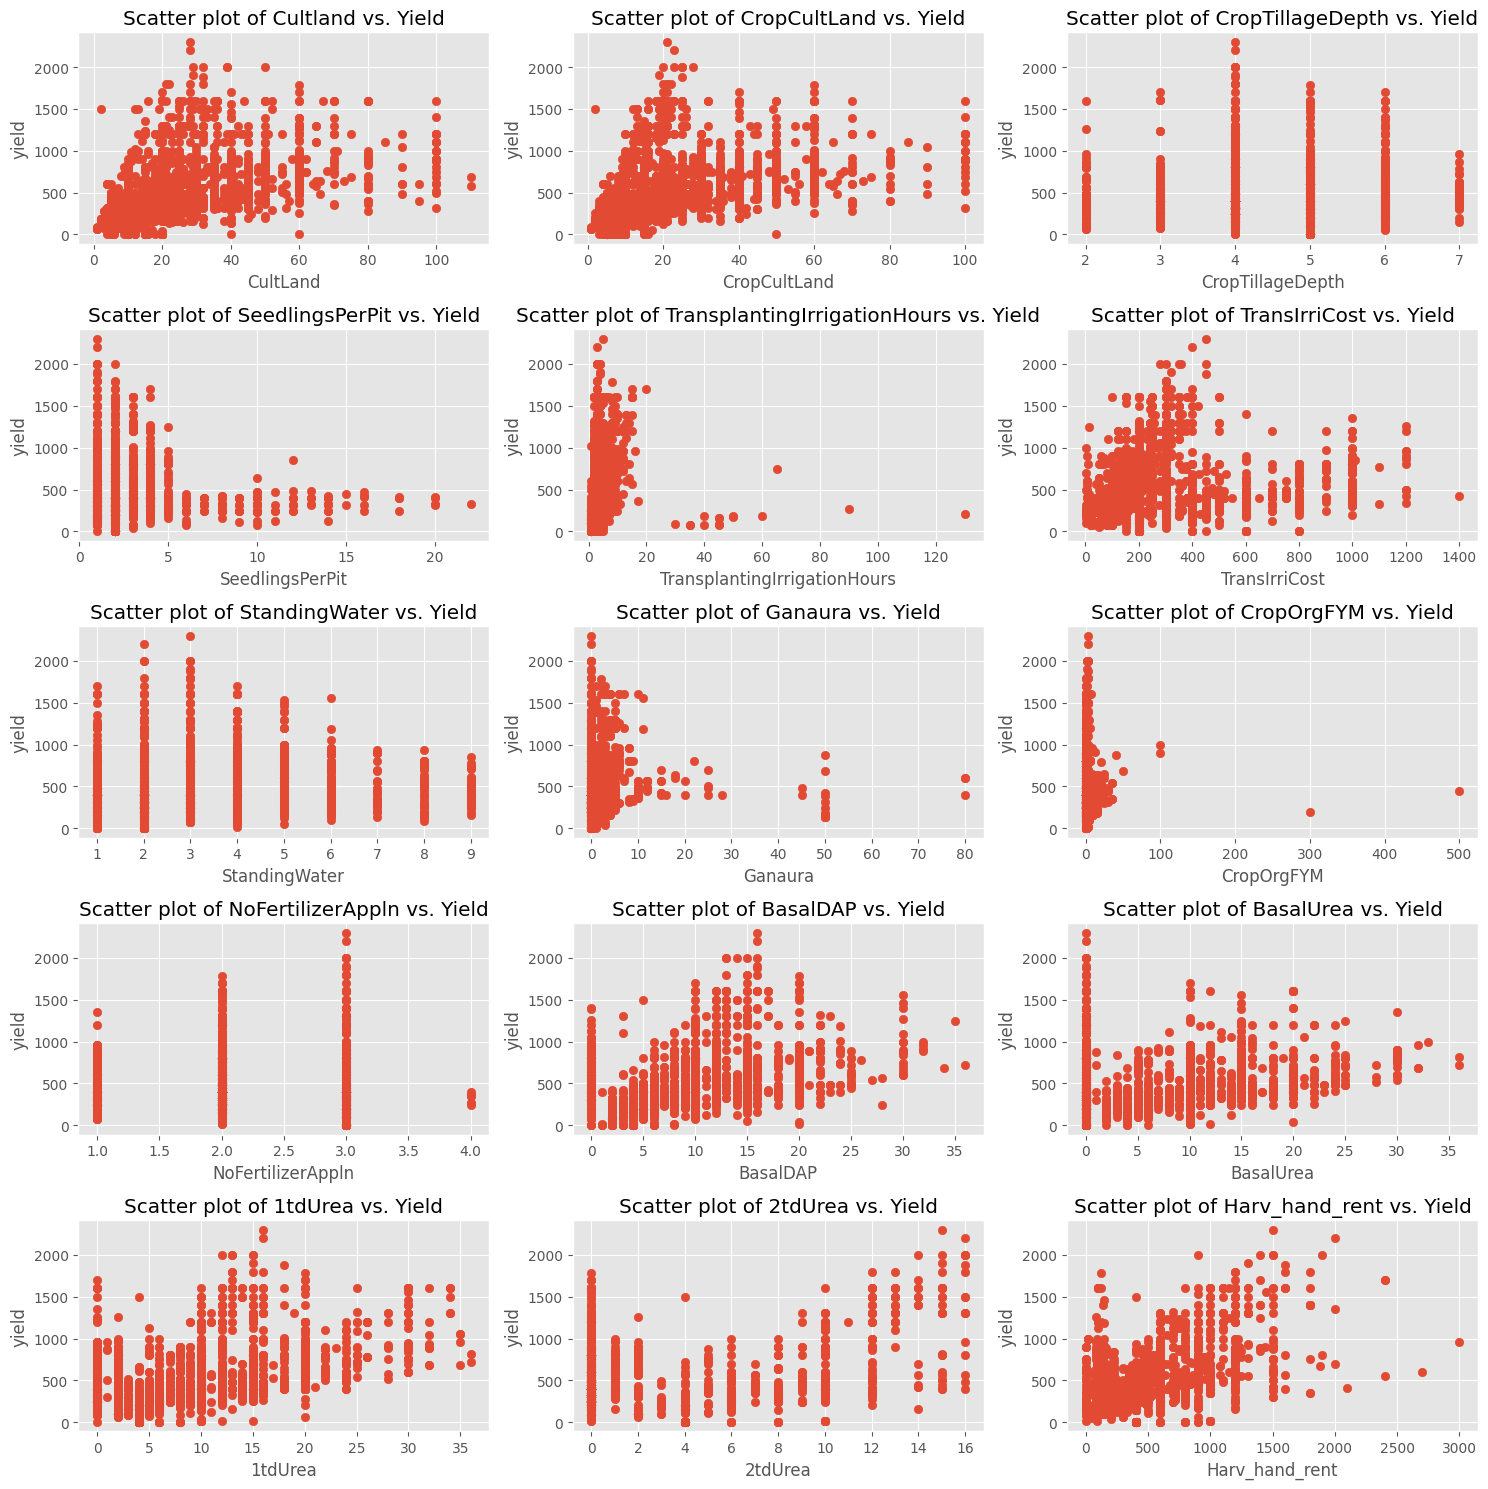

In [36]:
nrows = 5
ncols = 3
total_plots = nrows * ncols
fig, axs = plt.subplots(nrows =nrows, ncols=ncols, figsize=(15, 15))

#Flattening the array of subplots for easy iteration
axs = axs.flatten()

#List of descriptions for each plot
descriptions = [
    "Scatter plot of Cultland vs. Yield",
    "Scatter plot of CropCultLand vs. Yield",
    "Scatter plot of CropTillageDepth vs. Yield",
    "Scatter plot of SeedlingsPerPit vs. Yield",
    "Scatter plot of TransplantingIrrigationHours vs. Yield",
    "Scatter plot of TransIrriCost vs. Yield",
    "Scatter plot of StandingWater vs. Yield",
    "Scatter plot of Ganaura vs. Yield",
    "Scatter plot of CropOrgFYM vs. Yield",
    "Scatter plot of NoFertilizerAppln vs. Yield",
    "Scatter plot of BasalDAP vs. Yield",
    "Scatter plot of BasalUrea vs. Yield",
    "Scatter plot of 1tdUrea vs. Yield",
    "Scatter plot of 2tdUrea vs. Yield",
    "Scatter plot of Harv_hand_rent vs. Yield",
    
    
    
    
    
    
    
    
]
#numeric column and plot on the corresponding subplot
for i, column in enumerate(numeric_cols[:total_plots]):
    ax = axs[i]  #get the current axis
    ax.scatter(train[column], train['Yield'])
    ax.set_xlabel(column)
    ax.set_ylabel('yield')
    ax.set_title(descriptions[i])  #Set the description as title
    ax.grid(True)

for i in range(len(numeric_cols), nrows * ncols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [35]:
#Filter numeric columns
numeric_cols = train.select_dtypes(include='number').columns

#addressing outliers using z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(train[numeric_cols]))
outlier_mask = (z_scores < 3).all(axis=1)
train = train[outlier_mask]

# MODELING

1. Statistical Models

## Time Series Analysis

Reshaping the data to long format

The data has been in the Wide Format, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found in. Since column names are metadata, our algorithms will miss out on what dates each value is for.

This means that before we pass this data to our time  series models, we'll need to reshape our dataset to Long Format. This transformation involves restructuring the dataframe to have a single column for the Date and another column for the corresponding values. The Date column will be set as the index to establish the temporal order of the data points.

In [37]:
#Creating a copy to reshape it to long view
long_df =df.copy()

In [38]:
def melt_test(df):
    #Specify the columns to be melted (measured variables)
    value_vars = df.columns.difference(['District', 'Block']) #keeping 'District' and 'Block' columns as identifier variables

    #use pd.melt() to convert to long format
    melted = pd.melt(df, id_vars=['District', 'Block'], value_vars=value_vars, var_name='Variable', value_name='Value') #converting the rest of the columns to the 'Variable' and 'Value' columns

    #Remove rows with NaN values in the Value Column
    melted = melted.dropna(subset=["Value"])

    return melted

#call the function to convert the DataFrame to long format
long_test = melt_test(test)

In [39]:
df = pd.read_csv('Train.csv')

#specify the identifier variables
id_vars = ['District', 'Block', 'CultLand', 'CropCultLand', 'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth', 'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting', 'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationHours', 'TransplantingIrrigationSource', 'StandingWater', 'NoFertilizerAppln', 'CropbasalFerts', 'BasalDAP', 'MineralFertAppMethod', 'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method', 'Harv_date', 'Harv_hand_rent', 'Threshing_date', 'Threshing_method', 'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre']

#specify the variable that will be melted
value_vars = ['Yield']

#use the melt function to convert the DataFrame
long_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='Variable', value_name='Value')

###### This is a common preprocessing step when dealing with datasets in wide format, especially when you want to perform analyses or visualizations that work more naturally with long-format data.

In [89]:
# long_df = long_df.dropna(subset=['CropTillageDate'])
# long_df = long_df.dropna(subset=['RcNursEstDate'])
# long_df = long_df.dropna(subset=['Threshing_date'])
# long_df = long_df.dropna(subset=['Harv_date'])



In [40]:
print(long_df.head())

  District      Block  CultLand  CropCultLand  \
0  Nalanda  Noorsarai        45            40   
1  Nalanda     Rajgir        26            26   
2     Gaya      Gurua        10            10   
3     Gaya      Gurua        15            15   
4  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledR

# Indexing Datetime

Working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of DatetimeIndex type as the index allows for intuitive and efficient time-based indexing and slicing operations. It enables easy access to specific time periods, such as a particular day, month, or year. Additionally, the DatetimeIndex provides convenient methods for resampling, time shifting, and frequency conversion.

In [95]:
# # Convert 'CropTillageDate' to datetime format
# long_df['CropTillageDate'] = pd.to_datetime(long_df['CropTillageDate'])
# long_df['RcNursEstDate'] = pd.to_datetime(long_df['RcNursEstDate'])
# long_df['Threshing_date'] = pd.to_datetime(long_df['Threshing_date'])
# long_df['Harv_date'] = pd.to_datetime(long_df['Harv_date'])
# # Set the 'CropTillageDate' column as the index
# long_df.set_index('CropTillageDate', inplace=True)
# long_df.set_index('RcNursEstDate', inplace=True)
# long_df.set_index('Threshing_date', inplace=True)
# long_df.set_index('Harv_date', inplace=True)


In [41]:
#Renaming value Column to median_crop_price for intuition
long_df.rename(columns={"Value": "Median_crop_price"}, inplace=True)

In [42]:
#preview of cleaned Data
long_df.head()

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Variable,Median_crop_price
0,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,...,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,Yield,600
1,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,...,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,Yield,600
2,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,...,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,Yield,225
3,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,...,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,Yield,468
4,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,...,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,Yield,550


# Train - Test split

 This code divides the DataFrame into training and testing sets based on an 80-20 split, where the training set contains the first 80% of the rows, and the testing set contains the remaining 20%.

In [43]:
# Check if the index is a DatetimeIndex
if isinstance(long_df.index, pd.DatetimeIndex):
    # Calculate the cutoff date for splitting the dataset
    cutoff_date = long_df.index[int(len(long_df) * 0.8)]

    # Split the DataFrame into training and testing sets
    train = long_df.loc[long_df.index <= cutoff_date]
    test = long_df.loc[long_df.index > cutoff_date]
else:
    print("The index is not a DatetimeIndex.")


The index is not a DatetimeIndex.


# Time Series Decomposition

The presence of seasonality and trend in a time series can significantly impact the forecasted values. These components introduce systematic patterns and directional movements that need to be considered when making predictions. By understanding and accounting for the effects of seasonality and trend, more accurate forecasts can be generated for the time series data.

- Breaking the non-stationary time series into its three components—trend, seasonality, and residuals—is indeed a helpful approach for investigating the pattern in the past and aiding in the forecasting of future house values.

In [44]:
# Sample data with matching lengths for 'Date' and 'Value'
data = {
    'Date': pd.date_range(start='2022-07-19', periods = 5, freq='D'),
    'value': [600, 600, 225, 468, 550],
}

# createa DataFrame
df = pd.DataFrame(data)

#set the date column as index
df.set_index('Date', inplace=True)
print(df)

            value
Date             
2022-07-19    600
2022-07-20    600
2022-07-21    225
2022-07-22    468
2022-07-23    550


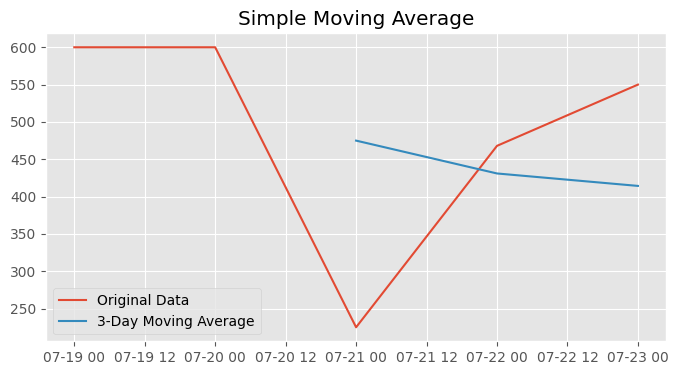

In [45]:
# sample data with only 5 observations
data = {
    'Date': pd.date_range(start='2022-07-19', periods = 5, freq='D'),
    'value': [600, 600, 225, 468, 550],
}

# create a DataFrame
df = pd.DataFrame(data)

#set the date column as index
df.set_index('Date', inplace=True)

#calculate a simple moving average with a window of 3 
window = 3
df['moving_average'] = df['value'].rolling(window=window).mean()

#plot the original data and moving average
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(df.index, df['moving_average'], label=f'{window}-Day Moving Average')
plt.title('Simple Moving Average')
plt.legend()  #to distinguish between the original data and the moving average
plt.show()

Stationarity Check

- By computing the **rolling mean** and **rolling standard deviation**, this code aims to assess the stationarity of the series. Stationarity refers to the property of a time series where its statistical properties such as mean and variance remain constant over time. The rolling mean and standard deviation can help identify trends or patterns in the data and provide insights into its stationarity.

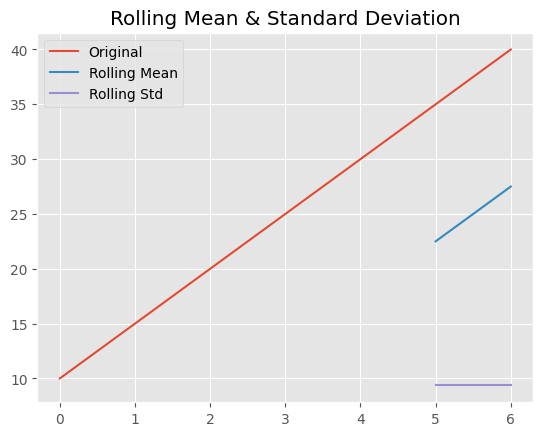

In [47]:
#computing the rolling mean and rolling std
data = [10, 15, 20, 25, 30, 35, 40]
train_set = pd.Series(data)
train_set = pd.Series(train_set)

#Compute Rolling Mean and Rolling Standard Deviation:
roll_mean = train_set.rolling(window=6).mean()
roll_std = train_set.rolling(window=6).std()

#checking for stationarity
plt.plot(train_set, label="Original")
plt.plot(roll_mean, label="Rolling Mean")
plt.plot(roll_std, label="Rolling Std")
plt.title("Rolling Mean & Standard Deviation")
plt.legend()

- The data is non stationary because the original values , Rolling mean are not constant over time

The **Dickey-Fuller test** also helps in assessing the stationarity of the time series data. The test statistic, p-value, and critical values can provide insights into the presence of trends and seasonality in the data.

In [48]:
# The dickey-fuller test for staionarity
from statsmodels.tsa.stattools import adfuller

def stationarity_check(data):
    df_test = adfuller(data)
    print('Results of Dickey-fuller test: \n')
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

stationarity_check(train_set)


Results of Dickey-fuller test: 

Test Statistic                 0.535281
p-value                        0.985907
Lags Used                      1.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


Detrending

There is a trend and seasonality in the dataset and so we'll use differencing to detrend the data to remove them from the series

In [49]:
from scipy.optimize import curve_fit

# Define a linear function (polynomial degree 1)
def linear_func(x, a, b):
    return a * x + b

# Replace 'x_values' and 'y_values' with your actual data
x_values = np.array([1, 2, 3, 4, 5], dtype=float)  # Replace with your time values as a numpy array
y_values = np.array([10, 20, 30, 40, 50], dtype=float)  # Replace with your data values as a numpy array

# Initial guesses for the linear coefficients (slope and intercept)
initial_guess = np.array([1.0, 1.0], dtype=float)

# Fit the linear function to the data
popt, _ = curve_fit(linear_func, x_values, y_values, p0=initial_guess)

# Subtract the linear fit from the original data
detrended_data = y_values - linear_func(x_values, *popt)

# Print the detrended data
print(detrended_data)

[ 1.58273394e-12  9.87654403e-13  3.94351218e-13 -1.98951966e-13
 -7.95807864e-13]


Model Identification (ACF and PACF):

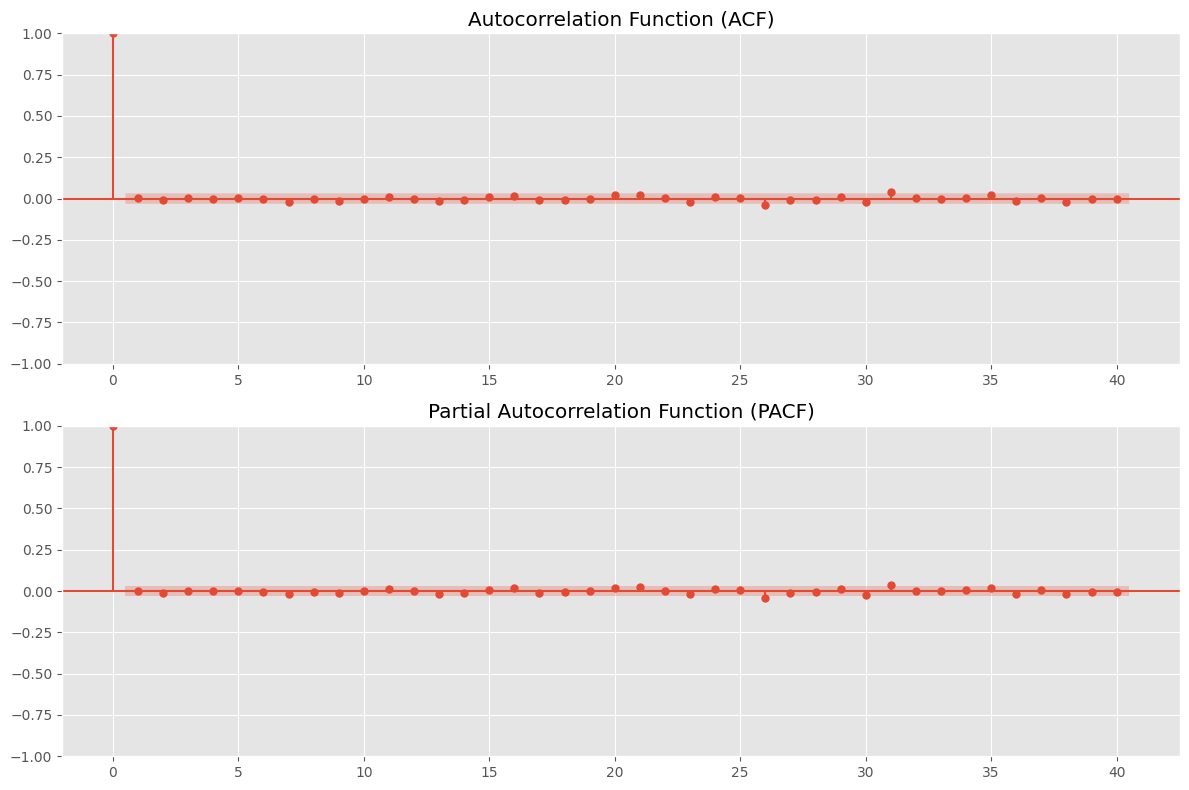

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Read timeseries data
df = pd.read_csv('Train.csv')
your_data = df['Yield']

# Create ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(your_data, lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(your_data, lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Building Models

ARIMA Model

In [51]:
from statsmodels.tsa.arima.model import ARIMA
# Sample data
data = {'Yield': [10, 15, 20, 25, 30, 35, 40]}
train_data = pd.DataFrame(data)

# ARIMA order parameters
p, d, q = 1, 1, 1

# Create the ARIMA model
model_arima = ARIMA(train_data['Yield'], order=(p, d, q))

# Fit the ARIMA model
model_arima_fit = model_arima.fit()

# Print the model summary
print(model_arima_fit.summary())

C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Yield   No. Observations:                    7
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  14.462
Date:                Fri, 19 Jan 2024   AIC                            -22.923
Time:                        13:10:56   BIC                            -23.548
Sample:                             0   HQIC                           -25.424
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.48e-05   4.04e+04      0.000       1.000       1.000
ma.L1          0.9996    2.2e-09   4.55e+08      0.000       1.000       1.000
sigma2      4.958e-05   4.43e-05      1.118      0.2

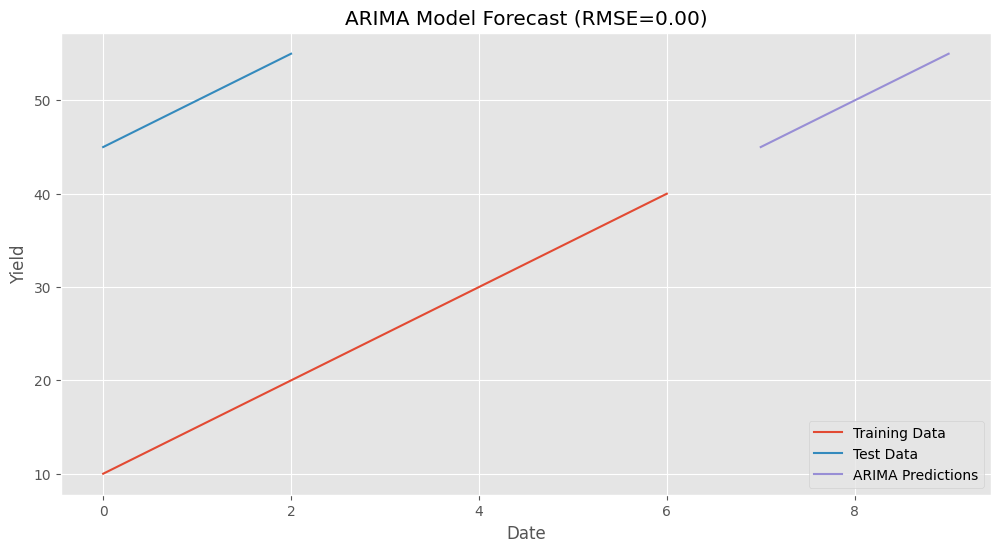

In [52]:
test_data = np.array([45, 50, 55])  # test data
predictions = model_arima_fit.forecast(steps=len(test_data))

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['Yield'], label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title(f'ARIMA Model Forecast (RMSE={rmse:.2f})')
plt.legend()
plt.show()



SARIMA Model

In [53]:
import pmdarima as pm

data = [10, 15, 20, 25, 30, 35, 40]

#create a Pandas Series from the data
data_series = pd.Series(data)

#specifythe lag for differencing
lag=1

#calculate the difference
data_diff = data_series.diff(periods=lag).dropna()

#using auto_arima it does a random search for the best pdq, PDQS
sarima_model = pm.auto_arima(data_diff, m=12, seasonal= True, start_p=0, start_q=0,
                             start_P=0, start_Q=0, max_order=6, test="adf", error_action="warn",
                             suppress_warnings=True, stepwise=True, trace=False)
print(sarima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                        SARIMAX   Log Likelihood                 -18.170
Date:                Fri, 19 Jan 2024   AIC                             38.341
Time:                        13:11:52   BIC                             38.132
Sample:                             0   HQIC                            37.507
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        25.0000   9.19e+16   2.72e-16      1.000    -1.8e+17     1.8e+17
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Pr

- The AIC value of 38.341 and BIC value of 38.132, indicates a worse fit compared to the Arima model.

SARIMA (Tuned)

In [54]:
#It uses itertools to iterate through different combinations of hyperparameters (p, d, q) and seasonal hyperparameters (P, D, Q, s), where s is the seasonality frequency (e.g., 12 for monthly data).
import itertools
#Iterate through potential pdq values for total dataset
# Define the p, d and q parameters to take any value between 0 
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]



In [55]:
import statsmodels.api as sm
# initialize an empty list called best- to store results of different SARIMA model
best = []
for combo in pdq:    
    for combos in pdqs:
        try:
            s_model = sm.tsa.statespace.SARIMAX(data_diff,
                                     order=combo,
                                     seasonal_order=combos,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False) #Initializes a SARIMA model with the current combination of hyperparameters.
            output = s_model.fit() #Fits the SARIMA model to the differenced time series
            best.append([combo, combos, output.aic]) # Appends the combination of hyperparameters and the AIC value to the best list.
           
        except:
            continue

C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

In [56]:
# This checks whether the best list is non-empty
if best:
    param_df = pd.DataFrame(best, columns=["pdq", "pdqs", "aic"])
    best_params = param_df.loc[param_df["aic"].idxmin()]
    print(best_params)
else:
    print(best)

pdq         (1, 0, 0)
pdqs    (0, 0, 0, 12)
aic       -101.945691
Name: 32, dtype: object


The best-tuned SARIMA model has a non-seasonal component with 1 AR term and no MA or differencing. 
- The seasonal component is not considered (all values are 0), suggesting that seasonality is adequately captured by the non-seasonal component. The model's AIC value is -101.945691, indicating a relatively good fit

C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                    6
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood                   0.000
Date:                            Fri, 19 Jan 2024   AIC                             26.000
Time:                                    13:20:06   BIC                                nan
Sample:                                         0   HQIC                               nan
                                              - 6                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ar.L2               0         -0   

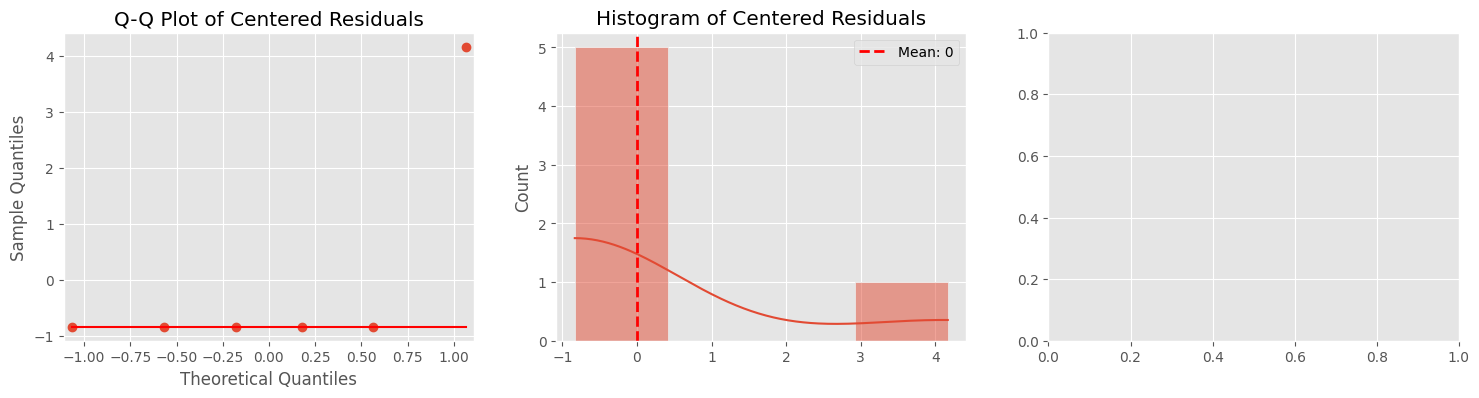

In [57]:
import statsmodels.api as sm
sarima_model_2 = sm.tsa.statespace.SARIMAX(data_diff,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

sarima_results = sarima_model_2.fit()

print(sarima_results.summary())

# Residual Analysis
residuals = sarima_results.resid

# Calculate Mean of Residuals
residuals_mean = np.mean(residuals)
print(f"Mean of Residuals: {residuals_mean:.4f}")

# Center Residuals around Zero
residuals_centered = residuals - residuals_mean

# Q-Q Plot and Histogram
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# Q-Q Plot
sm.qqplot(residuals_centered, line='q', ax=ax[0])
ax[0].set_title('Q-Q Plot of Centered Residuals')

# Histogram of Centered Residuals
sns.histplot(residuals_centered, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Centered Residuals')

# Plot Mean Line on Histogram
ax[1].axvline(0, color='red', linestyle='dashed', linewidth=2, label='Mean: 0')
ax[1].legend()

plt.show()

The purpose of this code is to perform an exhaustive search over a grid of hyperparameters to find the combination that results in the SARIMA model with the lowest AIC on the given differenced time series (data_diff). 
- The AIC is a criterion for model selection, and lower AIC values indicate better-fitting models. This grid search helps identify the optimal hyperparameters for the SARIMA model.

- After getting the best parameters from a range between 0 to 4 the best parameters were found to be (3,1,3). After tuning the SARIMA model obtained the lowest AIC value of 26 which indicates a better fit of the model to the data.

## 2. Machine learning models
### a). Decision Tree
I decided to use xgboost, a decision tree and a support vector machine learning models to analyse our data. These three models are useful for this type of analysis since they can best learn the data.


In [58]:
#import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

model_decision_tree =DecisionTreeRegressor

Split the data into training and testing sets, train the models on the training data and evaluate their performance on the testing data using appropiate metrics

In [59]:
# List of date columns
date_columns = ['CropTillageDate', 'RcNursEstDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting']

# List object columns excluding date columns
object_columns = [col for col in train.select_dtypes(include=['object']).columns if col not in date_columns]

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through the object columns (excluding date columns) and label encode
for column in object_columns:
    train[column] = label_encoder.fit_transform(train[column])

# Display the modified DataFrame
print(train.head())

   District  Block  CultLand  CropCultLand  LandPreparationMethod  \
1         2      7        26            26                     39   
2         0      2        10            10                     17   
3         0      2        15            15                     17   
5         3      1        10             5                     14   
6         1      4        12            12                     14   

  CropTillageDate  CropTillageDepth  CropEstMethod SeedingSowingTransplanting  \
1      2022-07-18                 5              3                 2022-07-20   
2      2022-06-30                 6              3                 2022-08-13   
3      2022-06-16                 6              3                 2022-07-17   
5      2022-07-02                 6              2                 2022-07-06   
6      2022-07-23                 3              3                 2022-07-30   

   SeedlingsPerPit  ...  Harv_method   Harv_date  Harv_hand_rent  \
1              2.0  ...       

In [60]:

X = train.drop(columns=['Yield'],axis=1)
y = train['Yield']

# List of date columns
date_columns = ['CropTillageDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting']

# Convert date columns to datetime format
for column in date_columns:
    X[column] = pd.to_datetime(X[column], errors='coerce')  # 'coerce' will replace parsing errors with NaT

# Extract features from datetime columns (example: day, month, year)
X['CropTillageDate_day'] = X['CropTillageDate'].dt.day
X['CropTillageDate_month'] = X['CropTillageDate'].dt.month
X['CropTillageDate_year'] = X['CropTillageDate'].dt.year

# X['RcNursEstDate_day'] = X['RcNursEstDate'].dt.day
# X['RcNursEstDate_month'] = X['RcNursEstDate'].dt.month
# X['RcNursEstDate_year'] = X['RcNursEstDate'].dt.year

X['Harv_date_day'] = X['Harv_date'].dt.day
X['Harv_date_month'] = X['Harv_date'].dt.month
X['Harv_date_year'] = X['Harv_date'].dt.year



# Drop the original datetime columns if you've extracted the features
X = X.drop(date_columns, axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
#Define the Decision Tree model
model = DecisionTreeRegressor(random_state=42)

#fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
# Make Predictions on the test data
y_pred = model.predict(X_test)
# Display the predicted values along with the actual values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)


      Actual  Predicted
3732     425      425.0
2171     300      250.0
3171     400      400.0
230      180      163.0
285      200      200.0
...      ...        ...
913      880      950.0
3792       4        4.0
3555     250      200.0
2857     740      735.0
259      800      700.0

[615 rows x 2 columns]


In [66]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 61.832520325203255
Mean Squared Error (MSE): 16855.48455284553
R-squared (R^2): 0.8490277844914857


Interpreting fitted model results
#### 1. Mean Absolute Error (MAE): This metric represents the average absolute difference between the predicted and actual values. In this case, the MAE of approximately 303 indicates, on average, my model's predictions are off by around 303 units from the actual yield values.

#### 2. Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. In this case, the MSE of approximately 739,454 suggests that there are some large errors between the predicted and actual values.

#### 3. R-squared (R^2): This metric represents the proportion of the variance in the dependent variable (yield) that is predictable from the independent variables. An R-squared of 0.195 means that your model explains about 20% of the variance in the yield. In other words, the model captures only a modest portion of the variability in the data.

- The MAE and MSE indicate that, on average, this model's predictions have a substantial error compared to the actual values.
- The R-squared value suggests that the model does not explain a significant amount of the variability in the yield, indicating potential limitations or inadequacies in the model.


### Hyperparameter Tuning using GridSearchCV:

Fine-tune hyperparameters for each machine learning model (XGBoost, decision trees, support vector machines) using GridSearchCV.

Then fit the models and find the appropriate hyperparameters for our models.

In [67]:
from sklearn.model_selection import GridSearchCV



# define hyperparameters
param_grid_decision_tree ={
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10]
}

#initialize DecisionTreeRegressor model
model_decision_tree = DecisionTreeRegressor()

#initialize GridSearchCV for each model
grid_search_decision_tree = GridSearchCV(estimator=model_decision_tree, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Finding the best models with tuned hyperparameters and make predictions on the data.

In [68]:
# get the best models with tuned hyperparameters
best_params_decision_tree = grid_search_decision_tree.best_params_
best_model_decision_tree = grid_search_decision_tree.best_estimator_

#make predictions with the best models
y_decision_tree_pred = best_model_decision_tree.predict(X_test)

Evaluating the best model

In [69]:
#Evaluate the best model
mae = mean_absolute_error(y_test, y_decision_tree_pred)
mse = mean_squared_error(y_test, y_decision_tree_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params_decision_tree)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r2)

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Mean Absolute Error (MAE): 88.71724037827858
Mean Squared Error (MSE): 21341.95095284459
R-Squared (R^2): 0.8490277844914857


Interpreting results of the evaluation.

    These metrics provide insights into how well your model is performing on the test set:

- MAE: The average absolute difference between predicted and actual values is 238.77, indicating the average absolute error.
- MSE: The average squared difference between predicted and actual values. A higher MSE suggests a larger variance in errors.
 - R-Squared (R^2): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. The value of 0.1992 indicates that the model explains 19.52% of the variance.

Visualizations of the Model's results.
- I visualized the results using plots such as scatter plots to compare predicted vs actual yields.

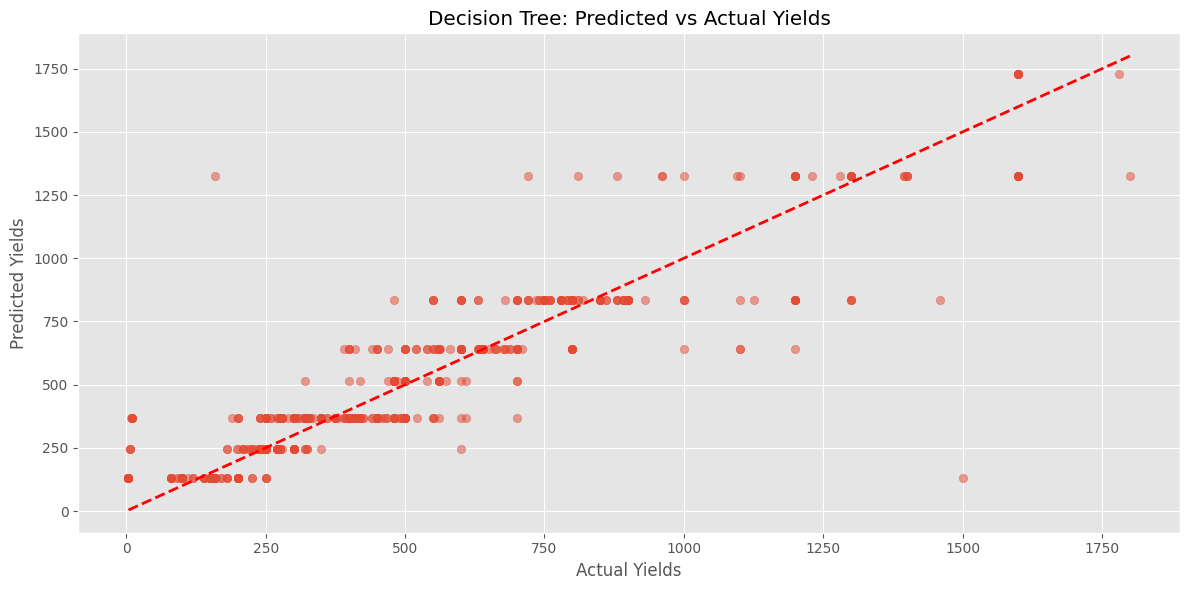

In [70]:
# Visualize the results (predicted vs actual yield)
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_decision_tree_pred, alpha=0.5)  # alpha adds transparency to the points, allowing to identify areas of higher point density.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Decision Tree: Predicted vs Actual Yields")
plt.xlabel("Actual Yields")
plt.ylabel("Predicted Yields")

plt.tight_layout()
plt.show()

Interpretation:

- Points Along the Diagonal Line: If points are clustered along the diagonal line, it suggests that the model's predictions closely align with the actual values. This is a positive indication of a well-performing model.
- Spread Away from the Diagonal Line: If points are spread away from the diagonal line, it indicates discrepancies between predicted and actual values. Larger spreads suggest greater prediction errors.


# b) RandomForest

I opted for Random Forest for this rice yield prediction because it's an ensemble method that handles non-linear relationships, categorical data, and outliers well. It offers feature importance insights and is robust for our dataset's size. It's a good starting point due to its generalization ability and doesn't require extensive tuning. I'll reassess its performance and explore alternatives if needed.

Splitting the data into train and test data.

In [71]:
from sklearn.impute import SimpleImputer

X = train.drop(columns=['Yield'],axis=1)
y = train['Yield']

# List of date columns
date_columns = ['CropTillageDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting']

# Convert date columns to datetime format
for column in date_columns:
    X[column] = pd.to_datetime(X[column], errors='coerce')  # 'coerce' will replace parsing errors with NaT

# Extract features from datetime columns (: day, month, year)
X['CropTillageDate_day'] = X['CropTillageDate'].dt.day
X['CropTillageDate_month'] = X['CropTillageDate'].dt.month
X['CropTillageDate_year'] = X['CropTillageDate'].dt.year

# X['RcNursEstDate_day'] = X['RcNursEstDate'].dt.day
# X['RcNursEstDate_month'] = X['RcNursEstDate'].dt.month
# X['RcNursEstDate_year'] = X['RcNursEstDate'].dt.year

X['Harv_date_day'] = X['Harv_date'].dt.day
X['Harv_date_month'] = X['Harv_date'].dt.month
X['Harv_date_year'] = X['Harv_date'].dt.year



# Drop the original datetime columns if you've extracted the features
X = X.drop(date_columns, axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the feature matrix
imputer = SimpleImputer(strategy='mean')  # Use 'mean', 'median', 'most_frequent', or a constant value
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)




If you're working with scikit-learn's RandomForestRegressor, you need to handle missing values in your input features (X) before training the model because this regressor does not handle NaN values. So I checked for the missing values

In [72]:
print("NaN values in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("NaN values in X_test_imputed:", np.isnan(X_test_imputed).sum())


NaN values in X_train_imputed: 0
NaN values in X_test_imputed: 0


In [73]:
nan_columns_train = X_train.columns[X_train.isnull().any()].tolist()
nan_columns_test = X_test.columns[X_test.isnull().any()].tolist()
print("Columns with NaN values in X_train:", nan_columns_train)
print("Columns with NaN values in X_test:", nan_columns_test)


Columns with NaN values in X_train: []
Columns with NaN values in X_test: []


In [74]:
# Train a Random Forest model
model= RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [75]:
# Make predictions
y_pred = model.predict(X_test)

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Compare training and test metrics
print("Training Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

print("\nTest Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Training Metrics:
Mean Absolute Error: 18.834315960912054
Mean Squared Error: 1120.6078663273613
R-squared: 0.9900008038971393

Test Metrics:
Mean Absolute Error: 52.07267479674796
Mean Squared Error: 11897.13099914634
R-squared: 0.8934390631426301


Hyperparameter tuning

In [76]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [50],
    'min_samples_split': [2],
    'max_features': [ 0.8],
    'min_samples_leaf': [1],
}


In [77]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

# create the grid search object
grid_search = GridSearchCV(model,param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

In [78]:
best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   max_features=best_params['max_features'],
                                   random_state=42)

best_model.fit(X, y)

RandomForestRegressor(max_depth=50, max_features=0.8, n_estimators=500,
                      random_state=42)

In [79]:
#make predictions
y_pred = best_model.predict(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#make predictions on the test and training data
y_train_pred= best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

#evaluate the model on test data
mae_train = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_test, y_test_pred)

#compare training and test data
print("Training Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

print("\nTest Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


Mean Absolute Error: 19.575970731707315
Mean Squared Error: 1690.3103274601626
R-squared: 0.9848601270266952


Training Metrics:
Mean Absolute Error: 19.575970731707315
Mean Squared Error: 1690.3103274601626
R-squared: 0.9848601270266952

Test Metrics:
Mean Absolute Error: 52.07267479674796
Mean Squared Error: 11897.13099914634
R-squared: 0.8934390631426301


Support Vector Machine

In [80]:
X = train.drop(columns= ['Yield', 'CropTillageDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting'],axis=1)
y = train['Yield']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creating an instance of the Support Vector Regressor
svm_model = SVR()

In [81]:
#standardizing the features since SVM is sensitive to feature scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
#Fitting the SVM model to the training data
svm_model.fit(X_train_scaled, y_train)

SVR()

In [83]:
#Making predictions on the test data
y_pred_test = svm_model.predict(X_test_scaled)

In [84]:
# Evaluating the model on test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_test_pred)

In [85]:

# Comparing training and test metrics

print("\nTest Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)



Test Metrics:
Mean Absolute Error: 198.92703572098526
Mean Squared Error: 90883.10004839291
R-squared: 0.9848601270266952


Creating Ensemble model

In [87]:
from sklearn.ensemble import VotingRegressor
import joblib


# Create instances of the models
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()
svm_model = SVR()

# Create a VotingRegressor ensemble
ensemble_model = VotingRegressor(estimators=[
    ('tree', tree_model),
    ('forest', forest_model),
    ('svm', svm_model)
])

# Fit the ensemble model on the training data

ensemble_model.fit(X_train, y_train)

# Save the ensemble model as ensemble.pkl
joblib.dump(ensemble_model, 'ensemble.pkl')


['ensemble.pkl']

In [88]:

# Load the ensemble model from the saved file
loaded_ensemble = joblib.load('ensemble.pkl')

# X_test is the test data

predictions = loaded_ensemble.predict(X_test)

# Use the predictions as needed
print(predictions)


[ 397.48292915  276.67274876  398.99551709  240.15589497  260.02830077
  430.46549843  338.5187044   773.91612264  560.97707513  419.58919656
  666.64304371  294.19414485  691.14629567  449.31518156  716.83047405
  260.23341225  428.21427837  453.85704771  290.71491864  698.6453447
  696.05346445  498.60502514  234.02216058  511.27778616  395.03761874
  905.73363025  411.6257766   459.90819124  576.94453758  272.18030379
  518.60090358  706.63590915  519.4317912   134.50409027  249.16222349
  355.17192192  395.88856271 1205.68119434  340.54734161  416.31130749
  386.01945195  247.95242524  394.64218822  499.65447045  379.37640739
  317.39244771  235.07697661  400.2855275   222.68111655  393.50092247
  133.12905736  592.44767636  377.81029674  718.99292308  356.90373261
  533.63725301  563.7724455  1202.4417577   394.48306397  290.68086429
  323.3775611   250.56737129  629.32200092  339.50730369  188.9586705
  344.32181984  251.77362135  453.77534493  785.72059023  363.11416253
  711.46